In [1]:
##importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ABINESH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Importing data
atlqio_metrics=pd.read_csv("D:/python practice projects/telecom/C3 Input_for_Participants/fact_atliqo_metrics.csv")
atlqio_metrics

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12
...,...,...,...,...,...,...,...
115,01-Sep-22,800008,Atliqo,11.86,250,4.74,0.38
116,01-Sep-22,641001,Atliqo,8.59,177,4.85,0.53
117,01-Sep-22,160017,Atliqo,10.32,163,6.33,0.63
118,01-Sep-22,122001,Atliqo,6.35,238,2.67,0.21


In [3]:
## Data celaning procedures
## Looking for null values in all the column
atlqio_metrics.isnull().sum()

date                        0
city_code                   0
company                     0
atliqo_revenue_crores       0
arpu                        0
active_users_lakhs          0
unsubscribed_users_lakhs    0
dtype: int64

C:\Users\ABINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atliqo_revenue_crores'>

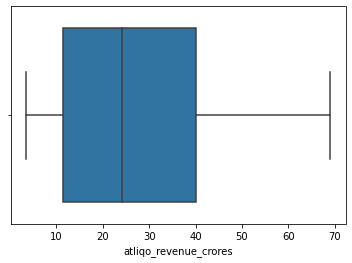

In [4]:
## Looking for outliers in the atliqo_revenue_crores column
sns.boxplot(atlqio_metrics["atliqo_revenue_crores"])

In [13]:
## Total revenue generated by atlqio

tot_rev=atlqio_metrics["atliqo_revenue_crores"].sum()
tot_rev
print("The total revenue generated in crores by atlqio is",tot_rev)

The total revenue generated in crores by atlqio is 3187.36


In [14]:
## Average revenue generated
avg_rev=atlqio_metrics["atliqo_revenue_crores"].mean()
round(avg_rev,2)
print("The average revenue generated in crores is",round(avg_rev,2))

The average revenue generated in crores is 26.56


C:\Users\ABINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arpu'>

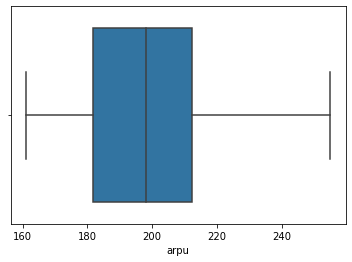

In [15]:
##looking for outliers in arpu column

sns.boxplot(atlqio_metrics["arpu"])

In [18]:
## Average revenue per user

avg_rev_per_user=atlqio_metrics["arpu"].mean()
round(avg_rev_per_user,2)
print("The average revenue per user is",round(avg_rev_per_user,2))

The average revenue per user is 200.74


C:\Users\ABINESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_users_lakhs'>

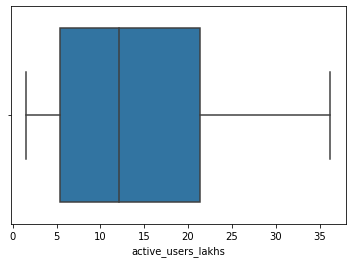

In [20]:
## looking for outliers in active_users_lakhs column

sns.boxplot(atlqio_metrics["active_users_lakhs"])

In [23]:
## Total active users

total_users=atlqio_metrics["active_users_lakhs"].sum()
print("The total active users in lakhs is",total_users)

The total active users in lakhs is 1617.23


In [30]:
## Average of active users per month
atlqio_metrics["date"]=pd.to_datetime(atlqio_metrics["date"])
atlqio_metrics.dtypes

date                        datetime64[ns]
city_code                            int64
company                             object
atliqo_revenue_crores              float64
arpu                                 int64
active_users_lakhs                 float64
unsubscribed_users_lakhs           float64
dtype: object

<Figure size 360x216 with 0 Axes>

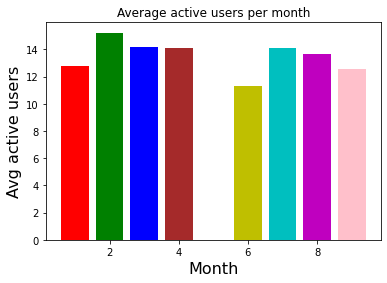

<Figure size 360x216 with 0 Axes>

In [240]:
atlqio_metrics["date"].dt.month
atlqio_metrics["Month"]=atlqio_metrics["date"].dt.month
avg_users=atlqio_metrics.groupby("Month").agg(avg_active_users_month=("active_users_lakhs","mean"))
avg_users=avg_users.reset_index()
plt.bar(avg_users["Month"],avg_users["avg_active_users_month"],color=["r","g","b","brown","y","c","m","pink"])
plt.xlabel("Month",fontsize=16)
plt.ylabel("Avg active users",fontsize=16)
plt.title("Average active users per month")
plt.figure(figsize=(5,3))

In [79]:
## Total unsubscribed users
atlqio_metrics["unsubscribed_users_lakhs"].sum()

125.9

In [77]:
##Importing market share data

market_share=pd.read_csv("D:/python practice projects/telecom/C3 Input_for_Participants/fact_market_share.csv")
market_share

,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61
3,01-Jan-22,560001,195.41,Atliqo,19.14
4,01-Jan-22,600001,166.78,Atliqo,18.47
...,...,...,...,...,...
595,01-Sep-22,800008,68.74,Others,5.87
596,01-Sep-22,641001,60.90,Others,7.22
597,01-Sep-22,160017,44.33,Others,7.35
598,01-Sep-22,122001,34.48,Others,7.30


In [52]:
## average market share captured by atliqo
market_share[market_share["company"]=="Atliqo"]["ms_pct"].mean()

19.56

In [54]:
## overall market share by all the companies

market_share[market_share["company"]=="Atliqo"]["ms_pct"].mean()
market_share[market_share["company"]=="Britel"]["ms_pct"].mean()
market_share[market_share["company"]=="PIO"]["ms_pct"].mean()
market_share[market_share["company"]=="DADAFONE"]["ms_pct"].mean()
market_share[market_share["company"]=="Others"]["ms_pct"].mean()

7.231583333333335

In [225]:
overall_market_share=pd.DataFrame({"company":["Atliqo","Britel","PIO","DADAFONE","Others"],
                                  "market_share_com":[round(market_share[market_share["company"]=="Atliqo"]["ms_pct"].mean(),2),
                                                     round(market_share[market_share["company"]=="Britel"]["ms_pct"].mean(),2),
                                                     round(market_share[market_share["company"]=="PIO"]["ms_pct"].mean(),2),
                                                     round(market_share[market_share["company"]=="DADAFONE"]["ms_pct"].mean(),2),
                                                     round(market_share[market_share["company"]=="Others"]["ms_pct"].mean(),2)]})

In [226]:
overall_market_share

,company,market_share_com
0,Atliqo,19.56
1,Britel,27.49
2,PIO,35.42
3,DADAFONE,10.31
4,Others,7.23


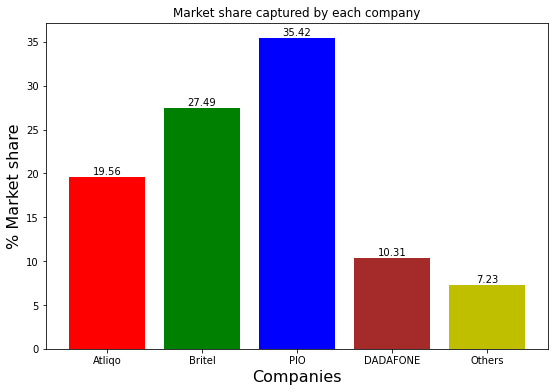

In [230]:
plt.figure(figsize=(9,6))
plt.bar(overall_market_share["company"],overall_market_share["market_share_com"],color=["r","g","b","brown","y"])
plt.title("Market share captured by each company")
plt.xlabel("Companies",fontsize=16)
plt.ylabel("% Market share",fontsize=16)
for index,data in enumerate(overall_market_share["market_share_com"]):
    plt.text(x=index,y=data+0.3 , s=f"{data}",ha="center")

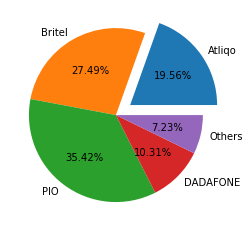

Text(0.5, 1.0, 'Market share captured by each company')

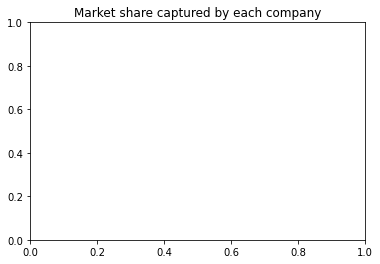

In [243]:
exp=[0.2,0,0,0,0]
plt.pie(overall_market_share["market_share_com"],labels=overall_market_share["company"],explode=exp,autopct="%2.2f%%")
plt.show()
plt.title("Market share captured by each company")

In [63]:
## Importing data to address further metrics and queries

atliqo_metrics=pd.read_csv("D:/python practice projects/telecom/C3 Input_for_Participants/fact_atliqo_metrics.csv")
atliqo_metrics
dim_date=pd.read_csv("D:/python practice projects/telecom/C3 Input_for_Participants/dim_date.csv")
dim_date

,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3
3,01-Apr-22,Apr,Before 5G,4
4,01-Jun-22,Jun,After 5G,1
5,01-Jul-22,Jul,After 5G,2
6,01-Aug-22,Aug,After 5G,3
7,01-Sep-22,Sep,After 5G,4


In [71]:
# joining both tables
final_data=atliqo_metrics.merge(dim_date,on="date",how="left")
final_data

array(['Atliqo'], dtype=object)

In [67]:
##Checking null values in the data
final_data.isnull().sum()

date                        0
city_code                   0
company                     0
atliqo_revenue_crores       0
arpu                        0
active_users_lakhs          0
unsubscribed_users_lakhs    0
month_name                  0
before/after_5g             0
time_period                 0
dtype: int64

In [126]:
##total revenue of all periods before 5G
x=final_data[final_data["before/after_5g"]=="Before 5G"]
revenue_before_5G=x.groupby("time_period").agg(total_revenue=("atliqo_revenue_crores","sum"))
revenue_before_5G=revenue_before_5G.reset_index()
revenue_before_5G

,time_period,total_revenue
0,1,354.37
1,2,425.69
2,3,410.45
3,4,407.19


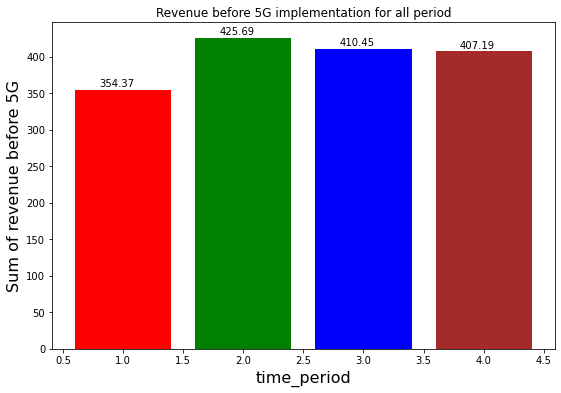

In [218]:
plt.figure(figsize=(9,6))
plt.bar(revenue_before_5G["time_period"],revenue_before_5G["total_revenue"],color=["r","g","b","brown"])
plt.title("Revenue before 5G implementation for all period")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum of revenue before 5G",fontsize=16)
for index,data in enumerate(revenue_before_5G["total_revenue"]):
    plt.text(x=index+0.8,y=data+5 , s=f"{data}")

In [128]:
## Total revenue for all periods after 5G
y=final_data[final_data["before/after_5g"]=="After 5G"]
revenue_after_5G=y.groupby("time_period").agg(total_revenue=("atliqo_revenue_crores","sum"))
revenue_after_5G=revenue_after_5G.reset_index()
revenue_after_5G

,time_period,total_revenue
0,1,357.56
1,2,412.76
2,3,419.08
3,4,400.26


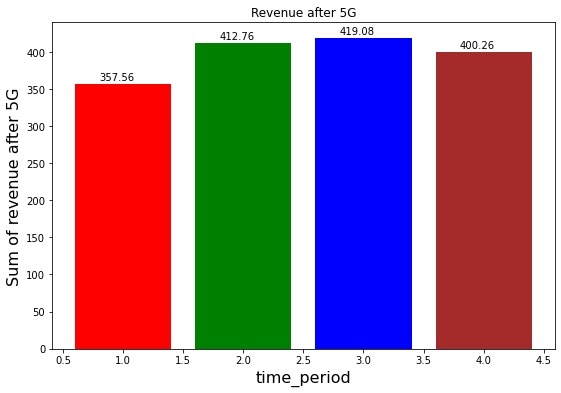

In [217]:
plt.figure(figsize=(9,6))
plt.bar(revenue_after_5G["time_period"],revenue_after_5G["total_revenue"],color=["r","g","b","brown"])
plt.title("Revenue after 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum of revenue after 5G",fontsize=16)
for index,data in enumerate(revenue_after_5G["total_revenue"]):
    plt.text(x=index+0.8,y=data+5 , s=f"{data}")

In [136]:
## sum of arpu before 5G
final_data
final_data_before_5G=final_data[final_data["before/after_5g"]=="Before 5G"]
final_data_before_5G_stat=final_data_before_5G.groupby("time_period").agg(sum_arpu=("arpu","sum"))
final_data_before_5G_stat=final_data_before_5G_stat.reset_index()
final_data_before_5G_stat

,time_period,sum_arpu
0,1,2812
1,2,2786
2,3,2947
3,4,2869


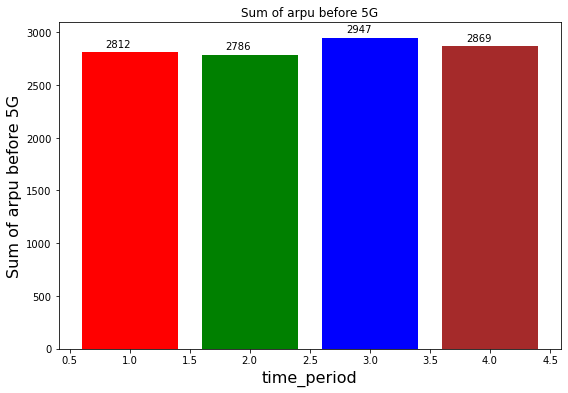

In [215]:
plt.figure(figsize=(9,6))
plt.bar(final_data_before_5G_stat["time_period"],final_data_before_5G_stat["sum_arpu"],color=["r","g","b","brown"])
plt.title("Sum of arpu before 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum of arpu before 5G",fontsize=16)
for index,data in enumerate(final_data_before_5G_stat["sum_arpu"]):
    plt.text(x=index+0.8,y=data+50 , s=f"{data}")

In [145]:
## Sum of arpu after 5G
final_data
final_data_after_5G=final_data[final_data["before/after_5g"]=="After 5G"]
final_data_after_5G_stat=final_data_after_5G.groupby("time_period").agg(arpu_sum=("arpu","sum"))
final_data_after_5G_stat=final_data_after_5G_stat.reset_index()
final_data_after_5G_stat

,time_period,arpu_sum
0,1,3267
1,2,3037
2,3,3143
3,4,3228


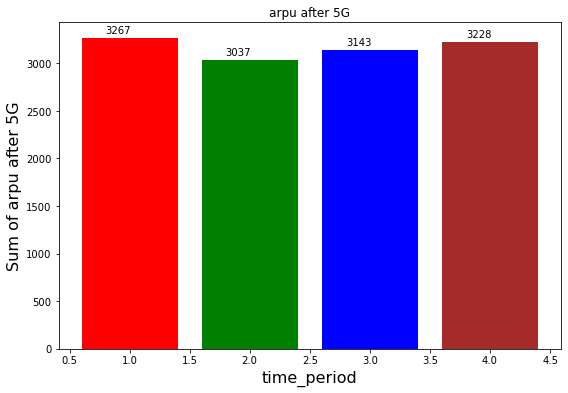

In [214]:
plt.figure(figsize=(9,6))
plt.bar(final_data_after_5G_stat["time_period"],final_data_after_5G_stat["arpu_sum"],color=["r","g","b","brown"])
plt.title("arpu after 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum of arpu after 5G",fontsize=16)
for index,data in enumerate(final_data_after_5G_stat["arpu_sum"]):
    plt.text(x=index+0.8,y=data+50 , s=f"{data}")

In [154]:
## Active users before 5G
final_data_before_5G
final_data_before_5G_b_users=final_data_before_5G.groupby("time_period").agg(b_act_users=("active_users_lakhs","sum"))
final_data_before_5G_b_users=final_data_before_5G_b_users.reset_index()
final_data_before_5G_b_users

,time_period,b_act_users
0,1,191.71
1,2,228.28
2,3,212.58
3,4,210.96


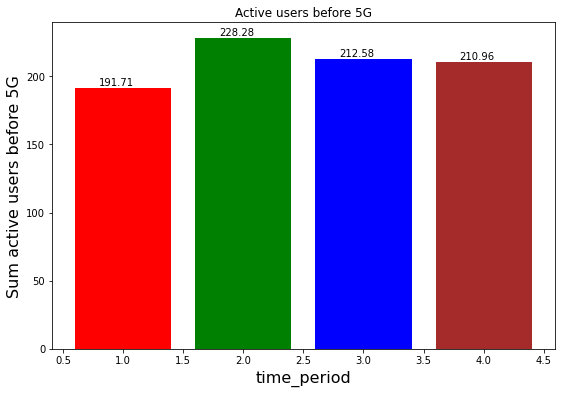

In [207]:
plt.figure(figsize=(9,6))
plt.bar(final_data_before_5G_b_users["time_period"],final_data_before_5G_b_users["b_act_users"],color=["r","g","b","brown"])
plt.title("Active users before 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum active users before 5G",fontsize=16)
for index,data in enumerate(final_data_before_5G_b_users["b_act_users"]):
    plt.text(x=index+0.8,y=data+2 , s=f"{data}")


In [159]:
## Active users after 5G
final_data_after_5G
final_data_after_5G_a_users=final_data_after_5G.groupby("time_period").agg(a_act_users=("active_users_lakhs","sum"))
final_data_after_5G_a_users=final_data_after_5G_a_users.reset_index()
final_data_after_5G_a_users

,time_period,a_act_users
0,1,169.94
1,2,211.13
2,3,204.41
3,4,188.22


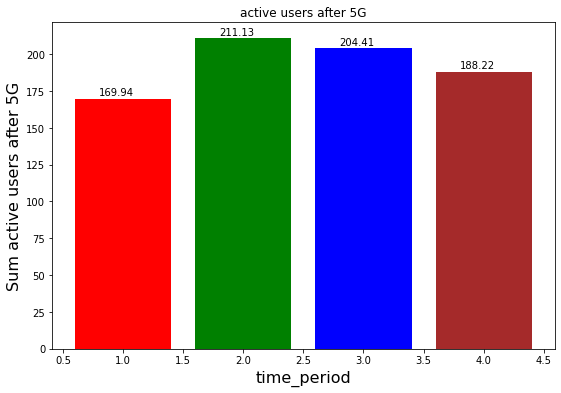

In [201]:
plt.figure(figsize=(9,6))
plt.bar(final_data_after_5G_a_users["time_period"],final_data_after_5G_a_users["a_act_users"],color=["r","g","b","brown"])
plt.title("active users after 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum active users after 5G",fontsize=16)
for index,data in enumerate(final_data_after_5G_a_users["a_act_users"]):
    plt.text(x=index+0.8,y=data+2 , s=f"{data}")


In [172]:
## Unsubscribed users before 5G
final_data_before_5G
final_data_before_5G_un_b5G=final_data_before_5G.groupby("time_period").agg(b_users=("unsubscribed_users_lakhs","sum"))
final_data_before_5G_un_b5G=final_data_before_5G_un_b5G.reset_index()
final_data_before_5G_un_b5G

,time_period,b_users
0,1,11.67
1,2,14.23
2,3,14.96
3,4,15.47


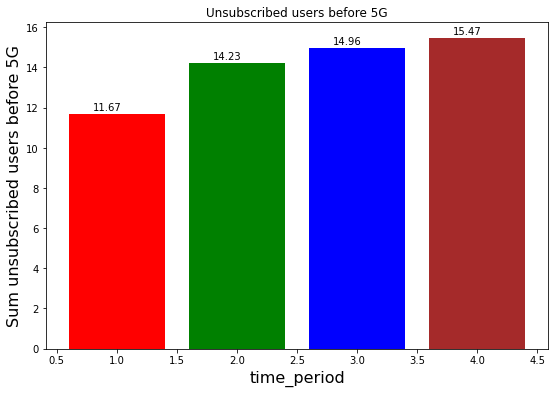

In [204]:
plt.figure(figsize=(9,6))
plt.bar(final_data_before_5G_un_b5G["time_period"],final_data_before_5G_un_b5G["b_users"],color=["r","g","b","brown"])
plt.title("Unsubscribed users before 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum unsubscribed users before 5G",fontsize=16)
for index,data in enumerate(final_data_before_5G_un_b5G["b_users"]):
    plt.text(x=index+0.8,y=data+0.2 , s=f"{data}")

In [179]:
## Total unsubscribed users after 5G
final_data_after_5G
final_data_after_5G_un_a5G=final_data_after_5G.groupby("time_period").agg(a_users=("unsubscribed_users_lakhs","sum"))
final_data_after_5G_un_a5G=final_data_after_5G_un_a5G.reset_index()
final_data_after_5G_un_a5G

,time_period,a_users
0,1,15.56
1,2,18.57
2,3,18.67
3,4,16.77


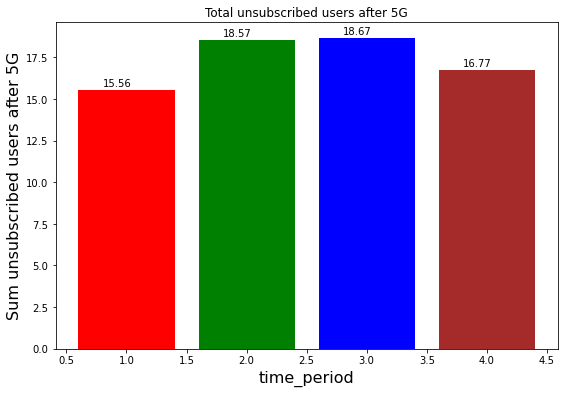

In [205]:
plt.figure(figsize=(9,6))
plt.bar(final_data_after_5G_un_a5G["time_period"],final_data_after_5G_un_a5G["a_users"],color=["r","g","b","brown"])
plt.title("Total unsubscribed users after 5G")
plt.xlabel("time_period",fontsize=16)
plt.ylabel("Sum unsubscribed users after 5G",fontsize=16)
for index,data in enumerate(final_data_after_5G_un_a5G["a_users"]):
    plt.text(x=index+0.8,y=data+0.2 , s=f"{data}")

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1
...,...,...,...,...,...,...,...,...,...,...
115,01-Sep-22,800008,Atliqo,11.86,250,4.74,0.38,Sep,After 5G,4
116,01-Sep-22,641001,Atliqo,8.59,177,4.85,0.53,Sep,After 5G,4
117,01-Sep-22,160017,Atliqo,10.32,163,6.33,0.63,Sep,After 5G,4
118,01-Sep-22,122001,Atliqo,6.35,238,2.67,0.21,Sep,After 5G,4
